### Exercícios [Lista 25-09](exercises/09-25_exercicios.pdf)

---
   
3. [Exercício 1](#Exercício-1:)
4. [Exercício 2](#Exercício-2:)
4. [Exercício 3](#Exercício-3:)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


#### Exercício 1:

Use o método de Euler implementado nas aulas anteriores para simular um pêndulo ideal
com que tem como modelo

$$\begin{cases} \theta'' = -\frac{g}{l}sen(\theta) \\ \theta(0) = \frac{\pi}{4} \\ \theta'(0) = 0 \end{cases}\mbox{, com }t \in [0, 100]\mbox{ e passo } h = 0.1$$


Faça um gráfico com os resultados (curva no plano $ \theta \times \theta'$). A simulação é consistente com o
modelo físico?


**R:** Nosso método soluciona equações do 1º grau, mas não do 2º grau.

Para tal, [devemos reeescrever o sistema de forma que continuemos com uma equação de 1ª ordem, mas com múltiplas variáveis](http://www.cpdee.ufmg.br/~amesquita/teaching/sdl_2012a/IntegracaoNumerica.pdf).

Nesse caso, definindo $y_1 = \theta$ e $y_2 = \theta'$, temos:

$$\begin{cases} y_{1}' = y_2 \\ y_{2}' = -\frac{g}{l}sen(y_{1})\end{cases}$$

E podemos definir também:

$$\begin{cases} y(t) = [y_{1}, y_{2}] = [\theta(t), \theta'(t)] \\ f(t, y(t)) = [y_{2}, y_{2}'] = \left[ \theta'(t), -\frac{g}{l}sen(\theta(t)) \right]\end{cases}$$

Ficando com a equação de 1ª ordem: $$\begin{cases} y(0) = [\frac{\pi}{4}, 0] \\ y'(t) = f(t, y(t)) \end{cases}$$

[O valor aproximado da gravidade é de 9,80665m/s²](https://pt.wikipedia.org/wiki/Acelera%C3%A7%C3%A3o_da_gravidade).

In [2]:
def euler_1a_ordem(f, y0, h, t_range):
    
    """
    Resolve o problema de valor inicial com o método de Euler de 1ª ordem.
    
    :param f: função lambda(t,y) de y' do problema
    :param y0: ponto inicial do problema
    :param h: passo escolhido
    :param t_range: intervalo em t ([lower, upper])
    
    :returns (t,y): estimação de y nos valores em t
    """
        
    y_ant = y0[1]
    t_ant = y0[0]
    
    t_est = [t_ant]
    y_est = [y_ant]
    
    while t_ant < t_range[1]:
        
        # passo de Taylor
        t = t_ant + h
        y = y_ant + f(t_ant, y_ant)*h
        
        y_est.append(y)
        t_est.append(t)
        
        # atualização dos termos
        y_ant = y
        t_ant = t
    
    return t_est, y_est

Para valores de $\theta \approx 0$, temos que $sen(\theta) \approx \theta$, logo, a solução analítica seria:

$$\theta'' = -\frac{g}{l}\theta \rightarrow  \begin{cases} \theta = \theta_{0} cos\left(\sqrt{\frac{g}{l}}t\right) \\ \theta' = -\theta_{0}\sqrt{\frac{g}{l}} sen\left(\sqrt{\frac{g}{l}}t\right)\end{cases}$$

Logo, $\frac{g}{l}\theta^{2} + \theta'^{2} = 1$, ou seja, esperamos observar uma circunferência.

In [3]:
g = 9.80665

def plot_pendulo(l, h, method, label):
    
    """
    Plota o resultado da aproximação do espaço de estado da equação do pêndulo (theta x theta').
    
    :param l: comprimento da corda
    :param h: passo do intervalo em t
    :param method: método para resolução do problema. eg: euler_1a_ordem, RungeKutta_45
    :param label: legenda do método para o gráfico
    
    :return y_est: valores (y, y') estimados
    """
    
    y0 = [0, np.array([np.pi/4, 0])]
    f = lambda t, y: np.array([y[1], -(g/l)*np.sin(y[0])])

    t_range = [0,100]
    
    t_est, y_est = method(f, y0, h, t_range)

    y = [i[0] for i in y_est]
    y_d = [i[1] for i in y_est]

    plt.plot(y, y_d, label=label)
    plt.legend()
    plt.show()
    
    return y_est

O resultado da aproximação para $l = 10$ é observado abaixo:

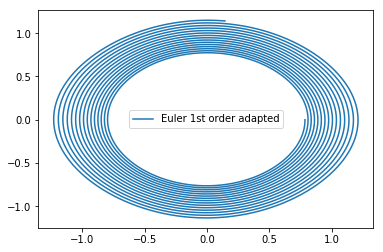

[array([0.78539816, 0.        ]),
 array([ 0.78539816, -0.00693435]),
 array([ 0.78532882, -0.0138687 ]),
 array([ 0.78519013, -0.02080257]),
 array([ 0.78498211, -0.02773547]),
 array([ 0.78470475, -0.03466693]),
 array([ 0.78435808, -0.04159647]),
 array([ 0.78394212, -0.04852361]),
 array([ 0.78345688, -0.05544785]),
 array([ 0.7829024 , -0.06236872]),
 array([ 0.78227872, -0.06928575]),
 array([ 0.78158586, -0.07619843]),
 array([ 0.78082387, -0.08310629]),
 array([ 0.77999281, -0.09000885]),
 array([ 0.77909272, -0.09690561]),
 array([ 0.77812367, -0.1037961 ]),
 array([ 0.77708571, -0.11067982]),
 array([ 0.77597891, -0.11755629]),
 array([ 0.77480335, -0.12442502]),
 array([ 0.7735591 , -0.13128551]),
 array([ 0.77224624, -0.13813728]),
 array([ 0.77086487, -0.14497983]),
 array([ 0.76941507, -0.15181267]),
 array([ 0.76789694, -0.1586353 ]),
 array([ 0.76631059, -0.16544724]),
 array([ 0.76465612, -0.17224797]),
 array([ 0.76293364, -0.17903701]),
 array([ 0.76114327, -0.185813

In [4]:
plot_pendulo(l=10, h=0.01, method=euler_1a_ordem, label='Euler 1st order adapted')

Para $l = 100$:

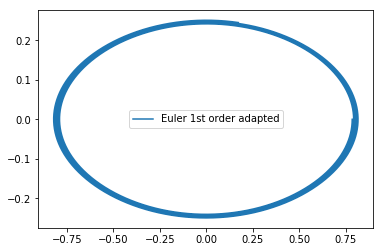

[array([0.78539816, 0.        ]),
 array([ 7.85398163e-01, -6.93434872e-04]),
 array([ 0.78539123, -0.00138687]),
 array([ 0.78537736, -0.0020803 ]),
 array([ 0.78535656, -0.00277372]),
 array([ 0.78532882, -0.00346713]),
 array([ 0.78529415, -0.00416051]),
 array([ 0.78525254, -0.00485388]),
 array([ 0.785204  , -0.00554721]),
 array([ 0.78514853, -0.00624051]),
 array([ 0.78508613, -0.00693377]),
 array([ 0.78501679, -0.00762699]),
 array([ 0.78494052, -0.00832016]),
 array([ 0.78485732, -0.00901328]),
 array([ 0.78476719, -0.00970634]),
 array([ 0.78467012, -0.01039933]),
 array([ 0.78456613, -0.01109226]),
 array([ 0.78445521, -0.01178512]),
 array([ 0.78433736, -0.0124779 ]),
 array([ 0.78421258, -0.0131706 ]),
 array([ 0.78408087, -0.01386321]),
 array([ 0.78394224, -0.01455573]),
 array([ 0.78379668, -0.01524816]),
 array([ 0.7836442 , -0.01594048]),
 array([ 0.78348479, -0.0166327 ]),
 array([ 0.78331847, -0.01732481]),
 array([ 0.78314522, -0.0180168 ]),
 array([ 0.78296505, -

In [5]:
plot_pendulo(l=100, h=0.01, method=euler_1a_ordem, label='Euler 1st order adapted')

Para $l = 1000$:

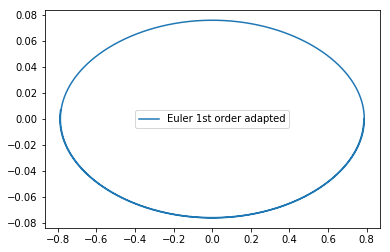

[array([0.78539816, 0.        ]),
 array([ 7.85398163e-01, -6.93434872e-05]),
 array([ 7.85397470e-01, -1.38686974e-04]),
 array([ 7.85396083e-01, -2.08030413e-04]),
 array([ 7.85394003e-01, -2.77373756e-04]),
 array([ 7.85391229e-01, -3.46716955e-04]),
 array([ 7.85387762e-01, -4.16059961e-04]),
 array([ 7.85383601e-01, -4.85402727e-04]),
 array([ 7.85378747e-01, -5.54745204e-04]),
 array([ 7.85373200e-01, -6.24087345e-04]),
 array([ 7.85366959e-01, -6.93429101e-04]),
 array([ 7.85360025e-01, -7.62770425e-04]),
 array([ 0.7853524 , -0.00083211]),
 array([ 0.78534408, -0.00090145]),
 array([ 0.78533506, -0.00097079]),
 array([ 0.78532535, -0.00104013]),
 array([ 0.78531495, -0.00110947]),
 array([ 0.78530386, -0.00117881]),
 array([ 0.78529207, -0.00124814]),
 array([ 0.78527959, -0.00131748]),
 array([ 0.78526641, -0.00138681]),
 array([ 0.78525254, -0.00145615]),
 array([ 0.78523798, -0.00152548]),
 array([ 0.78522273, -0.00159482]),
 array([ 0.78520678, -0.00166415]),
 array([ 0.785

In [6]:
plot_pendulo(l=1000, h=0.01, method=euler_1a_ordem, label='Euler 1st order adapted')

#### Exercício 2:

Refaça o exercício anterior usando o [método RungeKutta 4,5 adaptativo](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method) de seu programa de computação científica preferido.

Utilizando o método [`dopri5`](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.integrate.ode.html#dopri5) (Dormand & Prince) da classe `integrate.ode` do pacote `scipy`:

In [7]:
from scipy import integrate

def RungeKutta_45(f, y0, h, t_range):
    
    """
    Inicia o método de RungeKutta 4,5 do scipy  e estima os valores para um problema de valores inicias.    
    
    :param f: função lambda(t,y) de y' do problema
    :param y0: ponto inicial do problema
    :param h: passo escolhido
    :param t_range: intervalo em t ([lower, upper])
    
    :returns (t,y): estimação de y nos valores em t
    """
    
    F = integrate.ode(f).set_integrator("dopri5")
    F.set_initial_value(y0[1], y0[0])

    # adicionando o 1o ponto
    t = [y0[0]]
    y = [y0[1]] 

    # iterando em t
    while F.successful() and F.t < t_range[1]:

        F.integrate(F.t+h)

        t.append(F.t)
        y.append(F.y)
        
    return t, y

$h = 0.1$

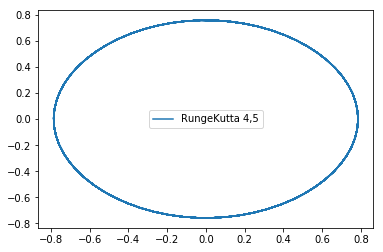

[array([0.78539816, 0.        ]),
 array([ 0.78193299, -0.06926329]),
 array([ 0.77156158, -0.13804408]),
 array([ 0.75435654, -0.20585344]),
 array([ 0.73043996, -0.27219035]),
 array([ 0.69998478, -0.33653738]),
 array([ 0.66321665, -0.39835864]),
 array([ 0.62041569, -0.45710024]),
 array([ 0.57191819, -0.51219396]),
 array([ 0.51811768, -0.56306433]),
 array([ 0.4594652 , -0.60913899]),
 array([ 0.3964683 , -0.64986228]),
 array([ 0.32968862, -0.6847111 ]),
 array([ 0.25973774, -0.71321251]),
 array([ 0.18727129, -0.73496136]),
 array([ 0.11298135, -0.74963697]),
 array([ 0.0375872 , -0.75701713]),
 array([-0.03817498, -0.75698829]),
 array([-0.11356338, -0.7495509 ]),
 array([-0.18784191, -0.73481938]),
 array([-0.26029144, -0.71301674]),
 array([-0.33022017, -0.68446439]),
 array([-0.39697278, -0.64956805]),
 array([-0.45993804, -0.60880115]),
 array([-0.51855473, -0.56268708]),
 array([-0.57231573, -0.5117817 ]),
 array([-0.62077044, -0.45665744]),
 array([-0.66352578, -0.397889

In [8]:
plot_pendulo(l=10, h=0.1, method=RungeKutta_45, label='RungeKutta 4,5')

$h = 0.2$

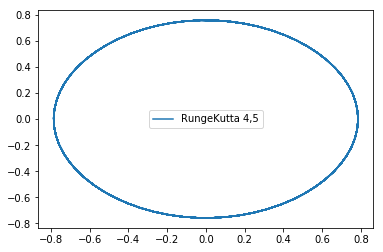

[array([0.78539816, 0.        ]),
 array([ 0.78193299, -0.06926329]),
 array([ 0.77156158, -0.13804408]),
 array([ 0.75435654, -0.20585344]),
 array([ 0.73043996, -0.27219035]),
 array([ 0.69998478, -0.33653738]),
 array([ 0.66321665, -0.39835864]),
 array([ 0.62041569, -0.45710024]),
 array([ 0.57191819, -0.51219396]),
 array([ 0.51811768, -0.56306433]),
 array([ 0.4594652 , -0.60913899]),
 array([ 0.3964683 , -0.64986228]),
 array([ 0.32968862, -0.6847111 ]),
 array([ 0.25973774, -0.71321251]),
 array([ 0.18727129, -0.73496136]),
 array([ 0.11298135, -0.74963697]),
 array([ 0.0375872 , -0.75701713]),
 array([-0.03817498, -0.75698829]),
 array([-0.11356338, -0.7495509 ]),
 array([-0.18784191, -0.73481938]),
 array([-0.26029144, -0.71301674]),
 array([-0.33022017, -0.68446439]),
 array([-0.39697278, -0.64956805]),
 array([-0.45993804, -0.60880115]),
 array([-0.51855473, -0.56268708]),
 array([-0.57231573, -0.5117817 ]),
 array([-0.62077044, -0.45665744]),
 array([-0.66352578, -0.397889

In [9]:
plot_pendulo(l=10, h=0.1, method=RungeKutta_45, label='RungeKutta 4,5')

$h = 0.01$

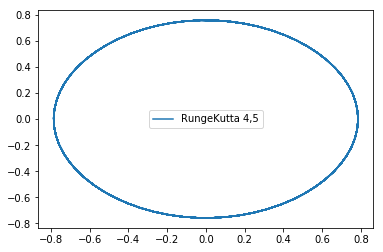

[array([0.78539816, 0.        ]),
 array([ 0.78193299, -0.06926329]),
 array([ 0.77156158, -0.13804408]),
 array([ 0.75435654, -0.20585344]),
 array([ 0.73043996, -0.27219035]),
 array([ 0.69998478, -0.33653738]),
 array([ 0.66321665, -0.39835864]),
 array([ 0.62041569, -0.45710024]),
 array([ 0.57191819, -0.51219396]),
 array([ 0.51811768, -0.56306433]),
 array([ 0.4594652 , -0.60913899]),
 array([ 0.3964683 , -0.64986228]),
 array([ 0.32968862, -0.6847111 ]),
 array([ 0.25973774, -0.71321251]),
 array([ 0.18727129, -0.73496136]),
 array([ 0.11298135, -0.74963697]),
 array([ 0.0375872 , -0.75701713]),
 array([-0.03817498, -0.75698829]),
 array([-0.11356338, -0.7495509 ]),
 array([-0.18784191, -0.73481938]),
 array([-0.26029144, -0.71301674]),
 array([-0.33022017, -0.68446439]),
 array([-0.39697278, -0.64956805]),
 array([-0.45993804, -0.60880115]),
 array([-0.51855473, -0.56268708]),
 array([-0.57231573, -0.5117817 ]),
 array([-0.62077044, -0.45665744]),
 array([-0.66352578, -0.397889

In [10]:
plot_pendulo(l=10, h=0.1, method=RungeKutta_45, label='RungeKutta 4,5')

#### Exercício 3:

Faça uma simulação do problema de três corpos (é possível estimar o próximo eclipse
solar?)